In [1]:
import pandas as pd
import numpy as np

In [2]:
import datetime

In [3]:
# read csv
emp_data = pd.read_csv(r'C:\Users\arnav\OneDrive\Desktop\Projects\AllState\Employee_Data.csv')
emp_data

,Employee ID,Name,Local Job Title,Band (ASPL),Employment Details Hire Date,Gender,DCIO,Division,Department,Location,Employee Status,Date of Exit
0,1000001,Employee 01,Managing Director,VP,5/11/2012,Male,SLT,CORPFN,Corp.Func,Bangalore,Active,NaN
1,1000002,Employee 02,Director,G,10/9/2012,Male,SLT,DEV,Corp.Func,Bangalore,Active,NaN
2,1000003,Employee 03,Director,G,15/10/2012,Male,SLT,CORPFN,Corp.Func,Bangalore,Active,NaN
3,1000004,Employee 04,Director,G,24/9/2012,Male,PRDTCH,AIS,Technology,Bangalore,Inactive,23/12/2019
4,1000005,Employee 05,Associate Manager,D,29/10/2012,Male,INFSEC,FLIGHT,Technology,Bangalore,Active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7658,1007659,Employee 7659,Associate Consultant,A3,28/6/2021,Female,PRDTCH,Operations,Technology,Bangalore,Active,NaN
7659,1007660,Employee 7660,Senior Consultant,B2,28/6/2021,Male,ESS,Operations,Technology,Bangalore,Active,NaN
7660,1007661,Employee 7661,Senior Consultant,B2,28/6/2021,Female,D3,Operations,Technology,Bangalore,Active,NaN
7661,1007662,Employee 7662,Associate Consultant,A3,28/6/2021,Female,PRDTCH,Operations,Technology,Bangalore,Active,NaN


In [4]:
# copy csv to make further changes and not affect original data
emp_data_copy = emp_data.copy()
emp_data_copy

,Employee ID,Name,Local Job Title,Band (ASPL),Employment Details Hire Date,Gender,DCIO,Division,Department,Location,Employee Status,Date of Exit
0,1000001,Employee 01,Managing Director,VP,5/11/2012,Male,SLT,CORPFN,Corp.Func,Bangalore,Active,NaN
1,1000002,Employee 02,Director,G,10/9/2012,Male,SLT,DEV,Corp.Func,Bangalore,Active,NaN
2,1000003,Employee 03,Director,G,15/10/2012,Male,SLT,CORPFN,Corp.Func,Bangalore,Active,NaN
3,1000004,Employee 04,Director,G,24/9/2012,Male,PRDTCH,AIS,Technology,Bangalore,Inactive,23/12/2019
4,1000005,Employee 05,Associate Manager,D,29/10/2012,Male,INFSEC,FLIGHT,Technology,Bangalore,Active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7658,1007659,Employee 7659,Associate Consultant,A3,28/6/2021,Female,PRDTCH,Operations,Technology,Bangalore,Active,NaN
7659,1007660,Employee 7660,Senior Consultant,B2,28/6/2021,Male,ESS,Operations,Technology,Bangalore,Active,NaN
7660,1007661,Employee 7661,Senior Consultant,B2,28/6/2021,Female,D3,Operations,Technology,Bangalore,Active,NaN
7661,1007662,Employee 7662,Associate Consultant,A3,28/6/2021,Female,PRDTCH,Operations,Technology,Bangalore,Active,NaN


In [5]:
# remove immediate unrequired columns.
emp_data_copy = emp_data_copy.drop(['Employee ID', 'Name', 'Band (ASPL)', 'DCIO'], axis=1)

In [6]:
# convert data type of values in column to string.
emp_data_copy['Date of Exit'] = emp_data_copy['Date of Exit'].astype(str) 

In [7]:
# convert data type of values in column to string.
emp_data_copy['Employment Details Hire Date'] = emp_data_copy['Employment Details Hire Date'].astype(str) 

In [8]:
# to check the datatype of values in columns
print(emp_data_copy.dtypes)

Local Job Title                 object
Employment Details Hire Date    object
Gender                          object
Division                        object
Department                      object
Location                        object
Employee Status                 object
Date of Exit                    object
dtype: object


In [9]:
# to check if changes have been made; 'nan' is the null value for string.
emp_data_copy['Date of Exit'][1] == 'nan'

True

In [10]:
# make a list for number of days worked by people who have left or have given date of notice
dur_days = [None]*7663
new_dur_days = []
for i in range(0, len(emp_data_copy)):
    if emp_data_copy['Date of Exit'][i] == 'nan':
        dur_days[i] = None
    else:
        in_date = pd.to_datetime(emp_data_copy['Employment Details Hire Date'][i], format = '%d/%m/%Y', errors='coerce')
        out_date = pd.to_datetime(emp_data_copy['Date of Exit'][i], format = '%d/%m/%Y', errors='coerce')
        days_temp = ((out_date - in_date).days)
        dur_days[i] = days_temp
        if out_date > in_date:
            new_dur_days.append(days_temp)
len(new_dur_days)

2753

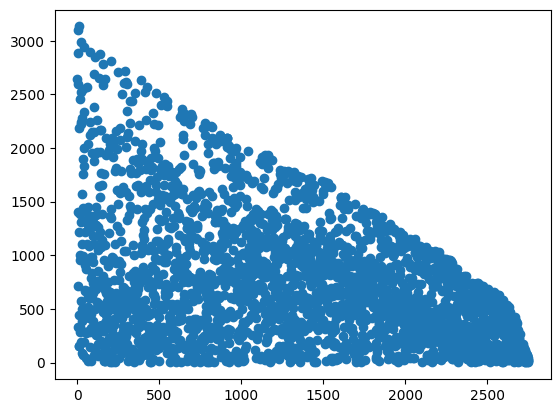

In [11]:
# plot the values obtained
import matplotlib.pyplot as plt
x = range(0, len(new_dur_days))
plt.scatter(x, new_dur_days)
plt.show()

* Copy Date of Exit Column to another column 'Latest_Date'.
* Fill nan values with '18/5/2022'
* Find difference of days.
* Put list values in new column 'Days_Worked_For'

In [12]:
emp_data_copy['Latest_Date'] = emp_data_copy['Date of Exit']
emp_data_copy['Latest_Date'] = emp_data_copy['Latest_Date'].replace('nan','18/5/2022')
# made a new column which gives all employees suitable latest dates

In [13]:
# check if changes have been implemented
emp_data_copy.head()

,Local Job Title,Employment Details Hire Date,Gender,Division,Department,Location,Employee Status,Date of Exit,Latest_Date
0,Managing Director,5/11/2012,Male,CORPFN,Corp.Func,Bangalore,Active,nan,18/5/2022
1,Director,10/9/2012,Male,DEV,Corp.Func,Bangalore,Active,nan,18/5/2022
2,Director,15/10/2012,Male,CORPFN,Corp.Func,Bangalore,Active,nan,18/5/2022
3,Director,24/9/2012,Male,AIS,Technology,Bangalore,Inactive,23/12/2019,23/12/2019
4,Associate Manager,29/10/2012,Male,FLIGHT,Technology,Bangalore,Active,nan,18/5/2022


In [14]:
working_days=[]
for i in range(len(emp_data_copy)):
    latest = pd.to_datetime(emp_data_copy['Latest_Date'][i], format='%d/%m/%Y', errors='coerce')
    day1 = pd.to_datetime(emp_data_copy['Employment Details Hire Date'][i], format = '%d/%m/%Y', errors='coerce')
    work_days = (latest - day1).days
    working_days.append(work_days)
        
emp_data_copy['Days_Worked_For'] = working_days

In [15]:
emp_data_copy.head()

,Local Job Title,Employment Details Hire Date,Gender,Division,Department,Location,Employee Status,Date of Exit,Latest_Date,Days_Worked_For
0,Managing Director,5/11/2012,Male,CORPFN,Corp.Func,Bangalore,Active,nan,18/5/2022,3481
1,Director,10/9/2012,Male,DEV,Corp.Func,Bangalore,Active,nan,18/5/2022,3537
2,Director,15/10/2012,Male,CORPFN,Corp.Func,Bangalore,Active,nan,18/5/2022,3502
3,Director,24/9/2012,Male,AIS,Technology,Bangalore,Inactive,23/12/2019,23/12/2019,2646
4,Associate Manager,29/10/2012,Male,FLIGHT,Technology,Bangalore,Active,nan,18/5/2022,3488


In [16]:
emp_data_copy['Days Worked'] = dur_days
emp_data_copy['Days Worked'] = emp_data_copy['Days Worked'].astype(float, errors='ignore')
# to check if the days are aligned properly
print(emp_data_copy.head())

     Local Job Title Employment Details Hire Date Gender Division  Department  \
0  Managing Director                    5/11/2012   Male   CORPFN   Corp.Func   
1           Director                    10/9/2012   Male      DEV   Corp.Func   
2           Director                   15/10/2012   Male   CORPFN   Corp.Func   
3           Director                    24/9/2012   Male      AIS  Technology   
4  Associate Manager                   29/10/2012   Male   FLIGHT  Technology   

    Location Employee Status Date of Exit Latest_Date  Days_Worked_For  \
0  Bangalore          Active          nan   18/5/2022             3481   
1  Bangalore          Active          nan   18/5/2022             3537   
2  Bangalore          Active          nan   18/5/2022             3502   
3  Bangalore        Inactive   23/12/2019  23/12/2019             2646   
4  Bangalore          Active          nan   18/5/2022             3488   

   Days Worked  
0          NaN  
1          NaN  
2          NaN  


In [17]:
''' to make sure that there are no such cases where the leaving date is before the hiring date'''

for i in range(0, len(emp_data_copy)):
    if emp_data_copy['Days Worked'][i] != 'nan':
        if float(emp_data_copy['Days Worked'][i]) < 0:
            emp_data_copy = emp_data_copy.drop(i)
emp_data_copy.shape

(7660, 11)

# Tangent: Data Analysis on given dataset
Finding basic observations and trends:

In [18]:
# relation between location and employee status
grp1 = emp_data_copy.groupby(['Location', 'Employee Status']).size()
grp1

Location   Employee Status
Bangalore  Active             1796
           Inactive           1511
Pune       Active             3260
           Inactive           1093
dtype: int64

In [19]:
# relation between gender and employee status
left_gen = emp_data_copy.groupby(['Gender', 'Employee Status']).size()
left_gen

Gender  Employee Status
Female  Active             1879
        Inactive            931
Male    Active             3177
        Inactive           1673
dtype: int64

In [20]:
# Job Status and employee status relation
left_roles = emp_data_copy.groupby(['Employee Status','Local Job Title']).size()
left_roles

Employee Status  Local Job Title     
Active           Analyst                 766
                 Associate               707
                 Associate Architect       1
                 Associate Consultant    156
                 Associate Manager       156
                                        ... 
Inactive         Tax Lead                  1
                 Team Lead                14
                 Team Leader              35
                 Test Architect            1
                 Transition Lead           1
Length: 102, dtype: int64

In [21]:
# department and division relation to employee status
left_dept_div = emp_data_copy.groupby(['Employee Status', 'Department', 'Division']).size()
left_dept_div

Employee Status  Department  Division  
Active           Corp.Func   ATSC             5
                             ATSV             1
                             CORPFN          57
                             DART             2
                             DEV             21
                             FLIGHT           3
                             IS               2
                             ISG              2
                             Operations      33
                 Operations  AIS             16
                             ATSC            43
                             ATSV            28
                             CORPFN          36
                             DART            43
                             DEV            303
                             FLIGHT          38
                             IS              33
                             ISG             52
                             Operations    2116
                 Technology  AIS             31


# Checkpoint
* Removed wrong tenure data.
### Next stage
* Convert time columns into time.
* Check unique values in each column again.
* Encode the data.

In [22]:
emp_data_copy['Employment Details Hire Date'] = pd.to_datetime(emp_data_copy['Employment Details Hire Date'], errors='coerce').dt.date

f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/11/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/11/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache

In [23]:
emp_data_copy['Date of Exit'] = pd.to_datetime(emp_data_copy['Date of Exit'], infer_datetime_format=True, errors='coerce').dt.date
print('Successfully converted datatype.')

Successfully converted datatype.


f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/10/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache

In [24]:
emp_data_copy['Days Worked'].dtypes

dtype('float64')

In [25]:
# good practice to replace whitespace with underscore.
emp_data_copy['Local Job Title'].replace(' ', '_', regex = True, inplace = True)
emp_data_copy['Local Job Title'].unique()[0:10]

array(['Managing_Director', 'Director', 'Associate_Manager',
       'Lead_Consultant', 'Senior_Consultant', 'Senior_Team_Leader',
       'Senior_Lead_Consultant', 'Team_Leader', 'Module_Lead',
       'Solution_Designer'], dtype=object)

In [26]:
emp_data_copy.columns = emp_data_copy.columns.str.replace(' ', '_')

In [27]:
emp_data_copy.dtypes

Local_Job_Title                  object
Employment_Details_Hire_Date     object
Gender                           object
Division                         object
Department                       object
Location                         object
Employee_Status                  object
Date_of_Exit                     object
Latest_Date                      object
Days_Worked_For                   int64
Days_Worked                     float64
dtype: object

In [28]:
emp_data_copy['Date_of_Exit'].dtypes

dtype('O')

In [29]:
emp_data_copy.head()

,Local_Job_Title,Employment_Details_Hire_Date,Gender,Division,Department,Location,Employee_Status,Date_of_Exit,Latest_Date,Days_Worked_For,Days_Worked
0,Managing_Director,2012-05-11,Male,CORPFN,Corp.Func,Bangalore,Active,NaT,18/5/2022,3481,NaN
1,Director,2012-10-09,Male,DEV,Corp.Func,Bangalore,Active,NaT,18/5/2022,3537,NaN
2,Director,2012-10-15,Male,CORPFN,Corp.Func,Bangalore,Active,NaT,18/5/2022,3502,NaN
3,Director,2012-09-24,Male,AIS,Technology,Bangalore,Inactive,2019-12-23,23/12/2019,2646,2646.0
4,Associate_Manager,2012-10-29,Male,FLIGHT,Technology,Bangalore,Active,NaT,18/5/2022,3488,NaN


In [30]:
print(emp_data_copy.columns)

Index(['Local_Job_Title', 'Employment_Details_Hire_Date', 'Gender', 'Division',
       'Department', 'Location', 'Employee_Status', 'Date_of_Exit',
       'Latest_Date', 'Days_Worked_For', 'Days_Worked'],
      dtype='object')


In [31]:
type(pd.NaT) # the null value for datetime.

pandas._libs.tslibs.nattype.NaTType

In [32]:
leaving = [0]*len(emp_data_copy)
for index, row in emp_data_copy.iterrows():
    if not pd.isna(row['Date_of_Exit']):
        leaving[index] =1
leaving[1290:1301]

[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1]

In [33]:
emp_data_copy['Leaving'] = leaving # target column
emp_data_copy[1290:1301] # random check

,Local_Job_Title,Employment_Details_Hire_Date,Gender,Division,Department,Location,Employee_Status,Date_of_Exit,Latest_Date,Days_Worked_For,Days_Worked,Leaving
1290,Senior_Consultant,2015-06-18,Male,IS&ISG,Technology,Bangalore,Inactive,2015-02-07,2/7/2015,14,14.0,1
1291,Lead_Consultant,2015-06-18,Male,DEV,Technology,Pune,Active,NaT,18/5/2022,2526,NaN,0
1292,Senior_Consultant,2015-06-18,Male,IS&ISG,Technology,Bangalore,Inactive,2015-10-28,28/10/2015,132,132.0,1
1293,Lead_Consultant,2015-06-22,Male,DEV,Technology,Bangalore,Active,NaT,18/5/2022,2522,NaN,0
1294,Lead_HR_Business_Partner,2015-06-22,Female,CORPFN,Corp.Func,Bangalore,Inactive,2016-10-27,27/10/2016,493,493.0,1
1295,Consultant,2015-06-22,Male,DEV,Technology,Pune,Inactive,2016-02-21,21/2/2016,244,244.0,1
1296,Team_Leader,2015-06-25,Male,ISG,Technology,Bangalore,Active,NaT,18/5/2022,2519,NaN,0
1297,Lead_Consultant,2015-06-29,Male,DEV,Technology,Pune,Active,NaT,18/5/2022,2515,NaN,0
1298,Senior_Lead_Consultant,2015-06-29,Male,DEV,Technology,Pune,Active,2021-06-30,30/6/2021,2193,2193.0,1
1299,Senior_Consultant,2015-06-29,Male,IS,Technology,Pune,Inactive,2017-01-20,20/1/2017,571,571.0,1


In [34]:
emp_data_copy['Hire_Year'] = pd.to_datetime(emp_data_copy['Employment_Details_Hire_Date']).dt.year

In [35]:
emp_data_copy.columns

Index(['Local_Job_Title', 'Employment_Details_Hire_Date', 'Gender', 'Division',
       'Department', 'Location', 'Employee_Status', 'Date_of_Exit',
       'Latest_Date', 'Days_Worked_For', 'Days_Worked', 'Leaving',
       'Hire_Year'],
      dtype='object')

## Features:
* Job Title
* Hire_Date (Years)
* Gender
* Division
* Department
* Location
* Days_Worked_For

## Target
Leaving / Not Leaving

In [36]:
features = ['Local_Job_Title', 'Hire_Year', 'Days_Worked_For', 'Gender', 'Division', 'Department', 'Location']
X = emp_data_copy[features]
y = emp_data_copy['Leaving']

### One-Hot Encoding

In [37]:
X.dtypes

Local_Job_Title    object
Hire_Year           int64
Days_Worked_For     int64
Gender             object
Division           object
Department         object
Location           object
dtype: object

In [38]:
X_encoded = pd.get_dummies(X, columns=['Local_Job_Title',
                                       'Gender',
                                       'Division',
                                       'Department',
                                       'Location'])
X_encoded.head()

,Hire_Year,Days_Worked_For,Local_Job_Title_Analyst,Local_Job_Title_Application_Developer,Local_Job_Title_Associate,Local_Job_Title_Associate_,Local_Job_Title_Associate_Architect,Local_Job_Title_Associate_Consultant,Local_Job_Title_Associate_IT_Consultant,Local_Job_Title_Associate_Manager,...,Division_IS,Division_IS&ISG,Division_ISG,Division_MARA,Division_Operations,Department_Corp.Func,Department_Operations,Department_Technology,Location_Bangalore,Location_Pune
0,2012,3481,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2012,3537,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2012,3502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2012,2646,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2012,3488,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [39]:
y.unique() # ensuring there are no unwanted values

array([0, 1], dtype=int64)

In [40]:
sum(y)/len(y) # attrition rate

0.360313315926893

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [42]:
#verify that stratify has worked
sum(y_test)/len(y_test)

0.360313315926893

In [43]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [44]:
clf_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1,
                            colsample_bynode=1,
                            colsample_bytree=0.5,
                            gamma=0.25, learn_rate=0.1,
                            learning_rate=0.1,
                            max_delta_step=0,
                            max_depth=4,
                            min_child_weight=1,
                            objective='binary:logistic',
                            missing=0,
                            n_estimators=100,
                            n_jobs=1,
                            n_thread=None, random_state=0,
                            reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
                            seed=42, silent=None, subsample=1, verbosity=1)

In [45]:
clf_xgb.fit(X_train, y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric='aucpr',
            eval_set = [(X_test, y_test)])

[14:37:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learn_rate" } are not used.

[0]	validation_0-aucpr:0.74158
[1]	validation_0-aucpr:0.85123
[2]	validation_0-aucpr:0.79079
[3]	validation_0-aucpr:0.96501
[4]	validation_0-aucpr:0.97723
[5]	validation_0-aucpr:0.97465
[6]	validation_0-aucpr:0.97302
[7]	validation_0-aucpr:0.97199
[8]	validation_0-aucpr:0.97215
[9]	validation_0-aucpr:0.97804
[10]	validation_0-aucpr:0.98181
[11]	validation_0-aucpr:0.98156
[12]	validation_0-aucpr:0.98005
[13]	validation_0-aucpr:0.97833
[14]	validation_0-aucpr:0.97695
[15]	validation_0-aucpr:0.98081
[16]	validation_0-aucpr:0.98343
[17]	validation_0-aucpr:0.98453
[18]	validation_0-aucpr:0.98346
[19]	validation_0-aucpr:0.98586
[20]	validation_0-aucpr:0.98540
[21]	validation_0-aucpr:0.98510
[22]	validation_0-aucpr:0.98587
[23]	validation_0-aucpr:0.98711
[24]	validation_0-aucpr:0.98696


f:\Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
f:\Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-aucpr:0.98677
[26]	validation_0-aucpr:0.98634
[27]	validation_0-aucpr:0.98753
[28]	validation_0-aucpr:0.98740
[29]	validation_0-aucpr:0.98820
[30]	validation_0-aucpr:0.99063
[31]	validation_0-aucpr:0.99057
[32]	validation_0-aucpr:0.99048
[33]	validation_0-aucpr:0.99158
[34]	validation_0-aucpr:0.99241
[35]	validation_0-aucpr:0.99241
[36]	validation_0-aucpr:0.99319
[37]	validation_0-aucpr:0.99302
[38]	validation_0-aucpr:0.99354
[39]	validation_0-aucpr:0.99351
[40]	validation_0-aucpr:0.99345
[41]	validation_0-aucpr:0.99339
[42]	validation_0-aucpr:0.99383
[43]	validation_0-aucpr:0.99417
[44]	validation_0-aucpr:0.99406
[45]	validation_0-aucpr:0.99428
[46]	validation_0-aucpr:0.99432
[47]	validation_0-aucpr:0.99449
[48]	validation_0-aucpr:0.99465
[49]	validation_0-aucpr:0.99458
[50]	validation_0-aucpr:0.99449
[51]	validation_0-aucpr:0.99456
[52]	validation_0-aucpr:0.99460
[53]	validation_0-aucpr:0.99461
[54]	validation_0-aucpr:0.99484
[55]	validation_0-aucpr:0.99485
[56]	val

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.25, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=0.1,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=1, n_thread=None, num_parallel_tree=None, ...)

In [46]:
y_pred = clf_xgb.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_pred)

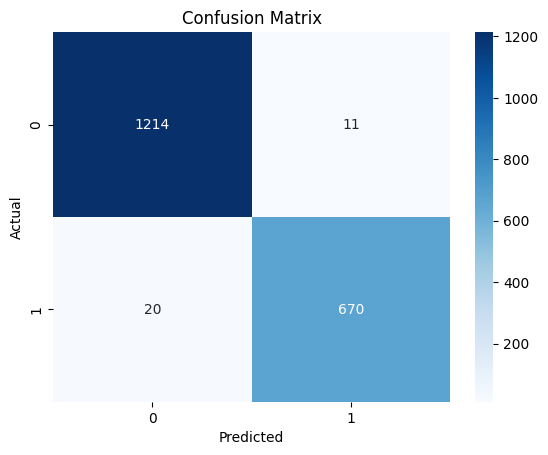

In [48]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


There are 1234 Active people and 681 Inactive people.
670 Inactive people were predicted correctly, while 11 were predicted to be inactive but were in fact Active.
1214 people were predicted to be active correctly, while 20 people were predicted as Active incorrectly.

In [49]:
print('Equal Accuracy: {} %'.format((670+1214)/ (670+1214+11+20)*100))
print('Equal Opportunity: {}%'.format(670/690*100))

Equal Accuracy: 98.38120104438643 %
Equal Opportunity: 97.10144927536231%
